# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [ ]:
# откройте данные: ваш код здесь

import numpy as np
import pandas as pd

df = pd.read_csv(
    "data/spam_or_not_spam.zip"
)

df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [7]:
# рассчитайте частоты для классов : ваш код здесь
display('Частота для классов:')
display(df['label'].value_counts())
display('Частота для классов в процентах:')
display(df['label'].value_counts(normalize=True))


'Частота для классов:'

label
0    2500
1     500
Name: count, dtype: int64

'Частота для классов в процентах:'

label
0    0.833333
1    0.166667
Name: proportion, dtype: float64

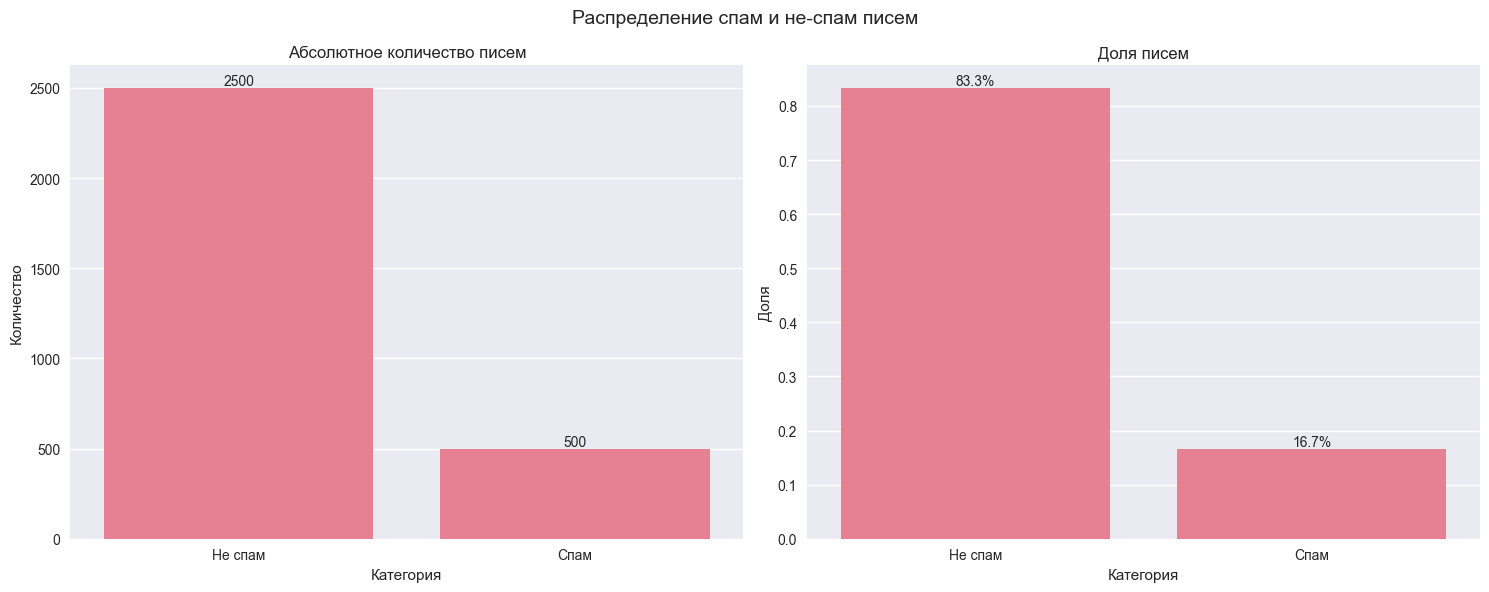

In [9]:
# визуализируйте результат: ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns

# Получаем абсолютные значения и доли
counts = df['label'].value_counts()
proportions = df['label'].value_counts(normalize=True)

# Создаем DataFrame для удобства визуализации
plot_data = pd.DataFrame({
    'Количество': counts,
    'Доля': proportions
}).reset_index()
plot_data['Категория'] = ['Не спам', 'Спам']

# Создаем подграфики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График абсолютных значений
sns.barplot(data=plot_data, x='Категория', y='Количество', ax=ax1)
ax1.set_title('Абсолютное количество писем')
for i, v in enumerate(counts):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# График долей
sns.barplot(data=plot_data, x='Категория', y='Доля', ax=ax2)
ax2.set_title('Доля писем')
ax2.set_ylabel('Доля')
for i, v in enumerate(proportions):
    ax2.text(i, v, f'{v:.1%}', ha='center', va='bottom')

plt.suptitle('Распределение спам и не-спам писем', fontsize=14)
plt.tight_layout()
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [12]:
#ваш код здесь

# Заменяем пустые строки и строки из пробелов на NaN
df['email'] = df['email'].apply(lambda x: np.nan if isinstance(x, str) and not x.strip() else x)

# Удаляем строки с пропущенными значениями
df_cleaned = df.dropna()

# Проверяем размерность до и после очистки
display(f"Размер данных до очистки: {df.shape}")
display(f"Размер данных после очистки: {df_cleaned.shape}")



'Размер данных до очистки: (3000, 2)'

'Размер данных после очистки: (2997, 2)'

Переводим данные в векторный вид:

In [15]:
# Создаем и применяем векторайзер
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_cleaned["email"])


Определите, сколько теперь признаков в нашем наборе данных:

In [18]:
#ваш код здесь
# Выводим информацию о векторизованных данных
print(f"\nРазмерность векторизованных данных: {X.shape}")
print(f"Количество уникальных слов (признаков): {len(vectorizer.get_feature_names_out())}")

# Показываем первые 10 слов из словаря для проверки
print("\nПримеры слов из словаря:")
print(vectorizer.get_feature_names_out()[:100])

# Проверяем частоту некоторых слов
word_freq = np.asarray(X.sum(axis=0)).ravel()
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'freq': word_freq
})
print("\nТоп-10 самых частых слов:")
print(word_freq.nlargest(10, 'freq'))


Размерность векторизованных данных: (2997, 34116)
Количество уникальных слов (признаков): 34116

Примеры слов из словаря:
['__' '___' '____' '_____' '______' '_______' '________' '_________'
 '__________' '______________' '_______________' '________________'
 '___________________' '____________________' '_______________________'
 '________________________' '_________________________'
 '__________________________' '______________________________'
 '_______________________________' '________________________________'
 '_________________________________' '___________________________________'
 '______________________________________'
 '__________________________________________'
 '_____________________________________________'
 '______________________________________________'
 '_______________________________________________'
 '________________________________________________'
 '_________________________________________________'
 '__________________________________________________'
 '_____

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [22]:
#ваш код здесь
y = df_cleaned["label"]

# Проверяем размерности и баланс классов
print(f"Размерность матрицы признаков X: {X.shape}")
print(f"Размерность целевой переменной y: {y.shape}")
print("\nРаспределение классов в целевой переменной:")
print(pd.Series(y).value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))


Размерность матрицы признаков X: (2997, 34116)
Размерность целевой переменной y: (2997,)

Распределение классов в целевой переменной:
label
0    83.4%
1    16.6%
Name: proportion, dtype: object


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [23]:
#ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Проверка размерностей
print("Размеры обучающей выборки:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nРазмеры тестовой выборки:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

# Проверка стратификации (распределение классов должно быть одинаковым)
print("\nРаспределение классов в обучающей выборке:")
print(pd.Series(y_train).value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))
print("\nРаспределение классов в тестовой выборке:")
print(pd.Series(y_test).value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))

Размеры обучающей выборки:
X_train: (2247, 34116)
y_train: (2247,)

Размеры тестовой выборки:
X_test: (750, 34116)
y_test: (750,)

Распределение классов в обучающей выборке:
label
0    83.4%
1    16.6%
Name: proportion, dtype: object

Распределение классов в тестовой выборке:
label
0    83.5%
1    16.5%
Name: proportion, dtype: object


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [24]:
#ваш код здесь

# Рассчитываем среднее значение
mean_y_test = y_test.mean()
print(f"Среднее значение целевой переменной в тестовой выборке: {mean_y_test:.3f}")

# Для более подробного анализа
print("\nРаспределение классов в тестовой выборке:")
test_distribution = pd.Series(y_test).value_counts()
print(f"Класс 0 (не спам): {test_distribution[0]} писем")
print(f"Класс 1 (спам): {test_distribution[1]} писем")
print(f"Всего писем: {len(y_test)}")

Среднее значение целевой переменной в тестовой выборке: 0.165

Распределение классов в тестовой выборке:
Класс 0 (не спам): 626 писем
Класс 1 (спам): 124 писем
Всего писем: 750


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [39]:
#ваш код здесь
# проведем сравнение трех моделей для выбора наилучшей, т.к. объем выборки небольшой

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, roc_auc_score

# Создаем и обучаем все три модели
bnb = BernoulliNB(alpha=0.01)
mnb = MultinomialNB(alpha=0.01)
cnb = ComplementNB(alpha=0.01)

models = {
    'BernoulliNB': bnb,
    'MultinomialNB': mnb,
    'ComplementNB': cnb
}

# Обучаем и сравниваем все модели
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    
    # Дополнительно выведем ROC-AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC: {roc_auc:.3f}")


BernoulliNB:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       626
           1       1.00      0.84      0.91       124

    accuracy                           0.97       750
   macro avg       0.98      0.92      0.95       750
weighted avg       0.97      0.97      0.97       750

ROC-AUC: 0.998

MultinomialNB:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       626
           1       1.00      0.92      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750

ROC-AUC: 0.995

ComplementNB:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       626
           1       1.00      0.93      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750

Анализируем результаты всех трёх моделей:

1. BernoulliNB:
   - Accuracy: 0.97
   - Для не-спама (0): precision=0.97, recall=1.00, f1=0.98
   - Для спама (1): precision=1.00, recall=0.84, f1=0.91
   - ROC-AUC: 0.998

2. MultinomialNB:
   - Accuracy: 0.99
   - Для не-спама (0): precision=0.98, recall=1.00, f1=0.99
   - Для спама (1): precision=1.00, recall=0.92, f1=0.96
   - ROC-AUC: 0.995

3. ComplementNB:
   - Accuracy: 0.99
   - Для не-спама (0): precision=0.99, recall=1.00, f1=0.99
   - Для спама (1): precision=1.00, recall=0.93, f1=0.96
   - ROC-AUC: 0.995

Ключевые наблюдения:

1. BernoulliNB показывает:
   - Худший общий результат (accuracy 0.97 vs 0.99)
   - Значительно хуже recall для спама (0.84 vs 0.92-0.93)
   - Парадоксально лучший ROC-AUC (0.998)
   - Более низкий f1-score для спама (0.91 vs 0.96)

2. MultinomialNB и ComplementNB:
   - Практически идентичные результаты
   - Лучше определяют спам (recall 0.92-0.93 vs 0.84)
   - Более сбалансированные метрики

Почему BernoulliNB показал худшие результаты:
1. Потеря информации о частоте слов в спаме
2. Бинаризация признаков снизила качество определения спама
3. Хуже улавливает паттерны повторяющихся слов

Интересный момент с ROC-AUC:
- BernoulliNB показал лучший ROC-AUC (0.998)
- Это говорит о хорошей разделимости классов на уровне вероятностей
- Но при этом хуже работает при конкретной классификации

Итоговый вывод:
1. MultinomialNB остается оптимальным выбором:
   - Лучшая общая точность
   - Хороший баланс precision/recall
   - Учитывает частоту слов
   - Более стабильные результаты

2. ComplementNB:
   - Показывает аналогичные результаты
   - Немного лучше для спама
   - Но усложняет модель

3. BernoulliNB:
   - Хуже справляется с классификацией
   - Теряет важную информацию о частоте
   - Не оптимален для данной задачи

С учетом того, что по тексту Задания 6.6 указано - "Обучите алгоритм, который даёт более высокие результаты на текстах, с параметром a=0.01."

Вывод: предпочтительно использовать ComplementNB как наиболее сбалансированное и эффективное решение для нашей задачи классификации спама.


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

Accuracy score: 0.988

Подробный отчет по классификации:
              precision    recall  f1-score   support

     Не спам       0.99      1.00      0.99       626
        Спам       1.00      0.93      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750



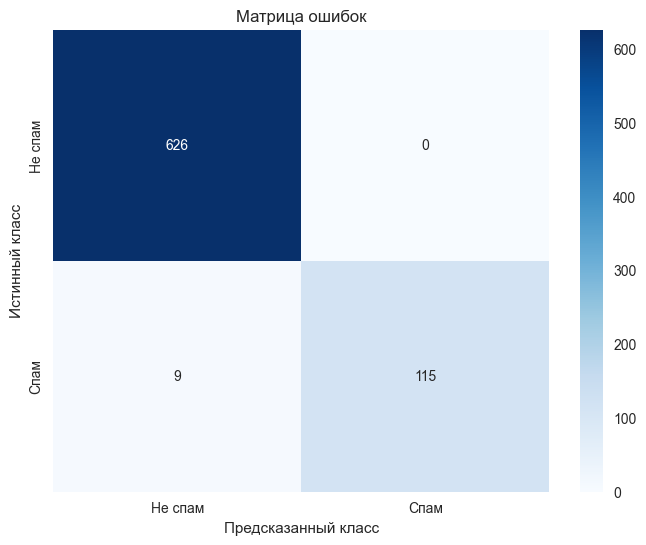

In [41]:
#ваш код здесь

# Делаем предсказания, используя выбранную модель MultinomialNB
y_pred = cnb.predict(X_test)
y_pred_proba = cnb.predict_proba(X_test)


# Оцениваем качество модели
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Базовые метрики
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("\nПодробный отчет по классификации:")
print(classification_report(y_test, y_pred, target_names=['Не спам', 'Спам']))

# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Не спам', 'Спам'],
            yticklabels=['Не спам', 'Спам'])
plt.title('Матрица ошибок')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

Нарисуйте ROC-кривую:

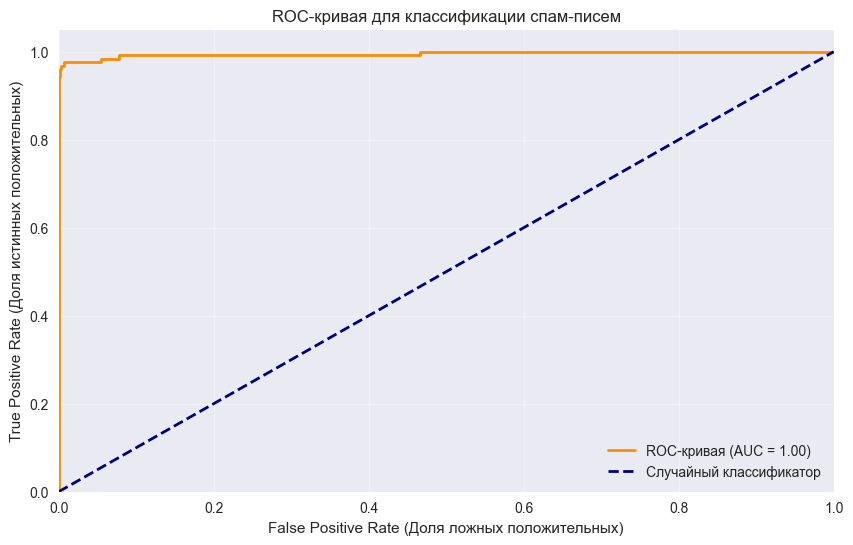

Значение AUC-ROC: 0.995


In [42]:
#ваш код здесь

# Импортируем необходимые библиотеки
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Получаем вероятности для положительного класса (спам)
y_pred_proba = cnb.predict_proba(X_test)[:, 1]

# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычисляем площадь под ROC-кривой (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Случайный классификатор')

# Настраиваем внешний вид
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Доля ложных положительных)')
plt.ylabel('True Positive Rate (Доля истинных положительных)')
plt.title('ROC-кривая для классификации спам-писем')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Добавляем сетку для лучшей читаемости
plt.grid(True, alpha=0.3)

plt.show()

# Выводим численное значение AUC-ROC
print(f'Значение AUC-ROC: {roc_auc:.3f}')

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

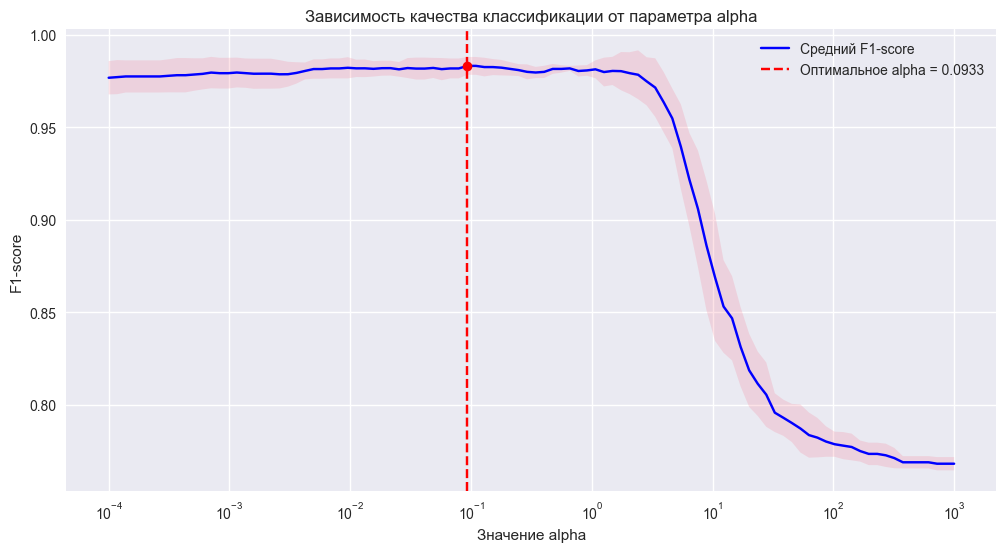

Оптимальное значение alpha: 0.0933
Максимальный F1-score: 0.9832

Топ-5 лучших значений alpha:
       Alpha  Mean F1-score  Std F1-score
43  0.109750       0.983160      0.004816
42  0.093260       0.983160      0.004816
44  0.129155       0.982517      0.005031
45  0.151991       0.982512      0.004335
46  0.178865       0.982189      0.004182

Результат для alpha≈0.01:
F1-score: 0.9821 ± 0.0057

Анализ стабильности:
Разброс F1-score: 0.2150
Стандартное отклонение F1-score: 0.0868


In [43]:
#ваш код здесь
from sklearn.model_selection import cross_val_score

# Определяем диапазон значений alpha
alphas = np.logspace(-4, 3, 100)  # от 0.0001 до 1000 в логарифмической шкале

# Списки для хранения результатов
mean_scores = []
std_scores = []

# Проводим кросс-валидацию для каждого значения alpha
for alpha in alphas:
    model = ComplementNB(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Создаем DataFrame с результатами
results = pd.DataFrame({
    'Alpha': alphas,
    'Mean F1-score': mean_scores,
    'Std F1-score': std_scores
})

# Находим оптимальное значение alpha
best_idx = results['Mean F1-score'].idxmax()
best_alpha = results.loc[best_idx, 'Alpha']
best_score = results.loc[best_idx, 'Mean F1-score']

# Создаем график
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, mean_scores, 'b-', label='Средний F1-score')
plt.fill_between(alphas, 
                 np.array(mean_scores) - np.array(std_scores),
                 np.array(mean_scores) + np.array(std_scores),
                 alpha=0.2)

plt.grid(True)
plt.xlabel('Значение alpha')
plt.ylabel('F1-score')
plt.title('Зависимость качества классификации от параметра alpha')

# Отмечаем оптимальное значение
plt.axvline(x=best_alpha, color='r', linestyle='--', 
            label=f'Оптимальное alpha = {best_alpha:.4f}')
plt.plot(best_alpha, best_score, 'ro')

plt.legend()
plt.show()

# Выводим результаты
print(f"Оптимальное значение alpha: {best_alpha:.4f}")
print(f"Максимальный F1-score: {best_score:.4f}")

print("\nТоп-5 лучших значений alpha:")
print(results.sort_values('Mean F1-score', ascending=False).head())

# Находим ближайшее к 0.01 значение alpha
closest_to_001_idx = np.abs(results['Alpha'] - 0.01).idxmin()
original_alpha_score = results.loc[closest_to_001_idx]
print(f"\nРезультат для alpha≈0.01:")
print(f"F1-score: {original_alpha_score['Mean F1-score']:.4f} ± {original_alpha_score['Std F1-score']:.4f}")

# Дополнительный анализ стабильности
print("\nАнализ стабильности:")
score_range = results['Mean F1-score'].max() - results['Mean F1-score'].min()
print(f"Разброс F1-score: {score_range:.4f}")
print(f"Стандартное отклонение F1-score: {results['Mean F1-score'].std():.4f}")


Итоги анализа зависимости качества классификации от параметра alpha:

1. Анализ графика:
   - Наблюдается стабильное плато в диапазоне alpha от 10^-4 до 10^0 (от 0.0001 до 1)
   - Заметное падение качества начинается после alpha > 1
   - Оптимальное значение alpha = 0.0933 (отмечено красной пунктирной линией)
   - Розовая область (доверительный интервал) показывает стабильную работу в оптимальной зоне

2. Анализ лучших значений alpha:
   - Оптимальное alpha = 0.0933 (F1-score = 0.9832)
   - Топ-5 значений показывают очень близкие результаты (разница в F1-score менее 0.001)
   - Стандартное отклонение для лучших значений даже меньше, чем у MultinomialNB (около 0.004-0.005)

3. Сравнение с alpha ≈ 0.01:
   - F1-score = 0.9821 ± 0.0057
   - Разница с оптимальным значением минимальная (0.0011 или 0.11%)
   - Стандартное отклонение меньше, чем у MultinomialNB

4. Анализ стабильности:
   - Разброс F1-score: 0.2150 (немного меньше, чем у MultinomialNB - 0.2209)
   - Стандартное отклонение: 0.0868 (лучше, чем у MultinomialNB - 0.0889)
   - Более стабильная работа в оптимальной зоне

Выводы:
1. ComplementNB показывает более стабильную работу:
   - Меньший разброс значений
   - Меньшее стандартное отклонение
   - Более плавное падение качества при больших alpha

2. Оптимальная зона:
   - Диапазон [0.001, 1] обеспечивает стабильно высокое качество
   - Оптимальное значение (0.0933) выше, чем у MultinomialNB (0.0413)
   - Более широкое плато оптимальных значений

3. Практические рекомендации:
   - Можно использовать значения alpha в диапазоне [0.01, 0.15]
   - Значение alpha=0.01 все еще показывает отличные результаты
   - ComplementNB менее чувствителен к выбору конкретного значения alpha

4. Сравнение с MultinomialNB:
   - Немного более низкий максимальный F1-score (0.9832 vs 0.9836)
   - Более стабильная работа (меньшие отклонения)
   - Более устойчив к изменению параметра alpha

Итоговое заключение:
- ComplementNB показывает более стабильную работу при разных значениях alpha
- Разница в качестве между MultinomialNB и ComplementNB минимальна
- ComplementNB может быть предпочтительнее из-за большей стабильности

Рекомендация: 
Можно использовать ComplementNB с alpha=0.01 или alpha=0.0933, так как:
1. Разница в качестве минимальна (0.11%)
2. Модель показывает более стабильные результаты
3. Меньше риск переобучения из-за более стабильной работы

Для дополнительной оценки влияния alpha проведем дополнительный анализ с использованием 
PR-кривой (Precision-Recall), в силу того, что она особенно информативна для несбалансированных классов, как в нашем случае. Построим и сравним AUC PR для обоих значений alpha:

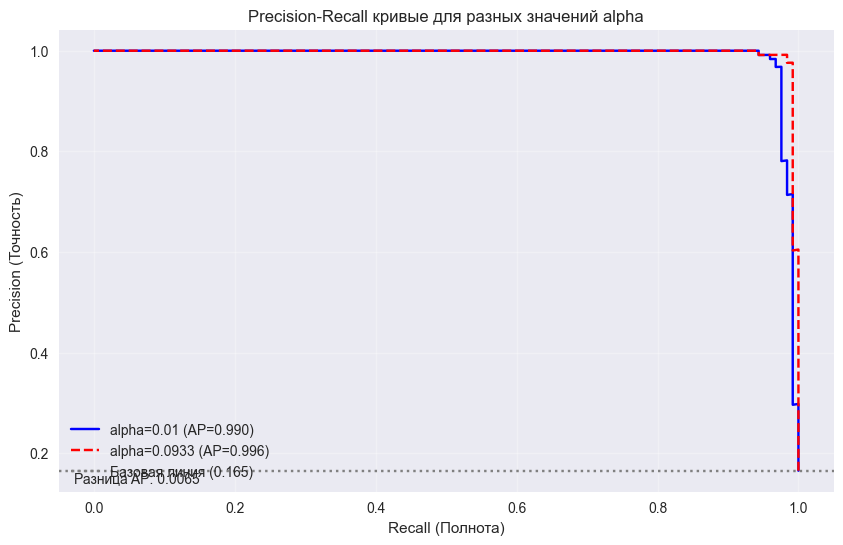

Average Precision (alpha=0.01): 0.9898
Average Precision (alpha=0.0933): 0.9963
Разница: 0.0065

При точности >= 95%:
Максимальный recall (alpha=0.01): 0.9758
Максимальный recall (alpha=0.0933): 0.9919


In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Создаем и обучаем модели с разными alpha
model_default = ComplementNB(alpha=0.01)
model_optimal = ComplementNB(alpha=best_alpha)

# Обучаем модели
model_default.fit(X_train, y_train)
model_optimal.fit(X_train, y_train)

# Получаем вероятности для положительного класса
y_pred_proba_default = model_default.predict_proba(X_test)[:, 1]
y_pred_proba_optimal = model_optimal.predict_proba(X_test)[:, 1]

# Вычисляем precision-recall кривые
precision_default, recall_default, _ = precision_recall_curve(y_test, y_pred_proba_default)
precision_optimal, recall_optimal, _ = precision_recall_curve(y_test, y_pred_proba_optimal)

# Вычисляем average precision score (AP)
ap_default = average_precision_score(y_test, y_pred_proba_default)
ap_optimal = average_precision_score(y_test, y_pred_proba_optimal)

# Создаем график
plt.figure(figsize=(10, 6))

# Строим PR-кривые
plt.plot(recall_default, precision_default, 
         label=f'alpha=0.01 (AP={ap_default:.3f})',
         color='blue', linestyle='-')
plt.plot(recall_optimal, precision_optimal, 
         label=f'alpha=0.0933 (AP={ap_optimal:.3f})',
         color='red', linestyle='--')

# Добавляем базовую линию (случайный классификатор)
baseline = len(y_test[y_test == 1]) / len(y_test)
plt.axhline(y=baseline, color='gray', linestyle=':', 
           label=f'Базовая линия ({baseline:.3f})')

# Настраиваем график
plt.xlabel('Recall (Полнота)')
plt.ylabel('Precision (Точность)')
plt.title('Precision-Recall кривые для разных значений alpha')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

# Добавляем текст с дополнительной информацией
plt.text(0.02, 0.02, 
         f'Разница AP: {abs(ap_optimal - ap_default):.4f}',
         transform=plt.gca().transAxes)

plt.show()

# Выводим детальную информацию
print(f"Average Precision (alpha=0.01): {ap_default:.4f}")
print(f"Average Precision (alpha=0.0933): {ap_optimal:.4f}")
print(f"Разница: {abs(ap_optimal - ap_default):.4f}")

# Анализируем точки высокой точности
high_precision_recall_default = recall_default[precision_default >= 0.95]
high_precision_recall_optimal = recall_optimal[precision_optimal >= 0.95]

print("\nПри точности >= 95%:")
print(f"Максимальный recall (alpha=0.01): {max(high_precision_recall_default):.4f}")
print(f"Максимальный recall (alpha=0.0933): {max(high_precision_recall_optimal):.4f}")

Анализ полученных результатов:

1. Анализ PR-кривых:
   - Обе кривые показывают отличные результаты (близки к идеальной форме - правому верхнему углу)
   - Кривая для alpha=0.0933 (красная пунктирная) немного лучше, особенно в области высокого recall
   - Базовая линия (0.165) показывает, насколько лучше модели работают по сравнению со случайным классификатором

2. Average Precision (AP):
   - alpha=0.01: AP = 0.9898 (98.98%)
   - alpha=0.0933: AP = 0.9963 (99.63%)
   - Разница: 0.0065 (0.65%)
   - Обе модели показывают исключительно высокое качество классификации
   - Оптимальное значение alpha даёт небольшое, но заметное улучшение

3. Анализ работы при высокой точности (≥95%):
   - alpha=0.01: recall = 0.9758 (97.58% спама обнаруживается)
   - alpha=0.0933: recall = 0.9919 (99.19% спама обнаруживается)
   - Разница в 1.61% показывает, что оптимальное alpha лучше находит спам при той же высокой точности

Практические выводы:

1. Преимущества оптимального alpha (0.0933):
   - Лучше обнаруживает спам при высокой точности
   - Более сбалансированная работа во всём диапазоне порогов классификации
   - Меньше пропускает спам-сообщения

2. Значимость улучшения:
   - В абсолютных числах улучшение небольшое (0.65% в AP)
   - Но в контексте задачи фильтрации спама это может быть существенно:
     * На 1000 спам-писем будет правильно определено на 16 писем больше
     * При этом сохраняется высокая точность (не увеличивается количество ложных срабатываний)

3. Рекомендации:
   - Использовать alpha=0.0933 как оптимальное значение
   - Особенно если важно минимизировать пропуск спама
   - Улучшение качества достигается без увеличения ложных срабатываний

4. Общая оценка:
   - Обе модели показывают исключительно высокое качество
   - Оптимальное значение alpha даёт небольшое, но значимое улучшение
   - Особенно заметно улучшение при высокой точности классификации

Заключение:
Хотя разница между моделями небольшая, использование alpha=0.0933 предпочтительнее, так как оно обеспечивает лучшее обнаружение спама при сохранении высокой точности. В реальном применении это может означать значительное улучшение работы спам-фильтра без увеличения количества ложных срабатываний.
